## Importa os pacotes básicos (essencial)

In [1]:
import tensorflow as tf
from tensorflow import keras

## Correção do uso de memória pelo tensorflow (essencial)

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Criação e treinamento do modelo

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jun  3 09:59:43 2021

@author: golz
"""

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

batch_size = 32 
num_classes = 10
epochs = 100
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))


model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)


if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True, callbacks=[tbCallBack])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    historico=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test), callbacks=[tbCallBack])
    
    scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss",scores[0])
print("Test Accuracy",scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 48)        13872     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 48)        0         
_______________________________________________

## Salva o histórico para plotar mais tarde

In [4]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(historico.history) 

# or save to csv: 
hist_csv_file = 'historico.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## Salva o modelo treinado

In [5]:
model.save('meu_modelo')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: meu_modelo/assets


## Carrega o modelo salvo

In [ ]:
model = keras.models.load_model('meu_modelo')

## Gráficos de treinamento

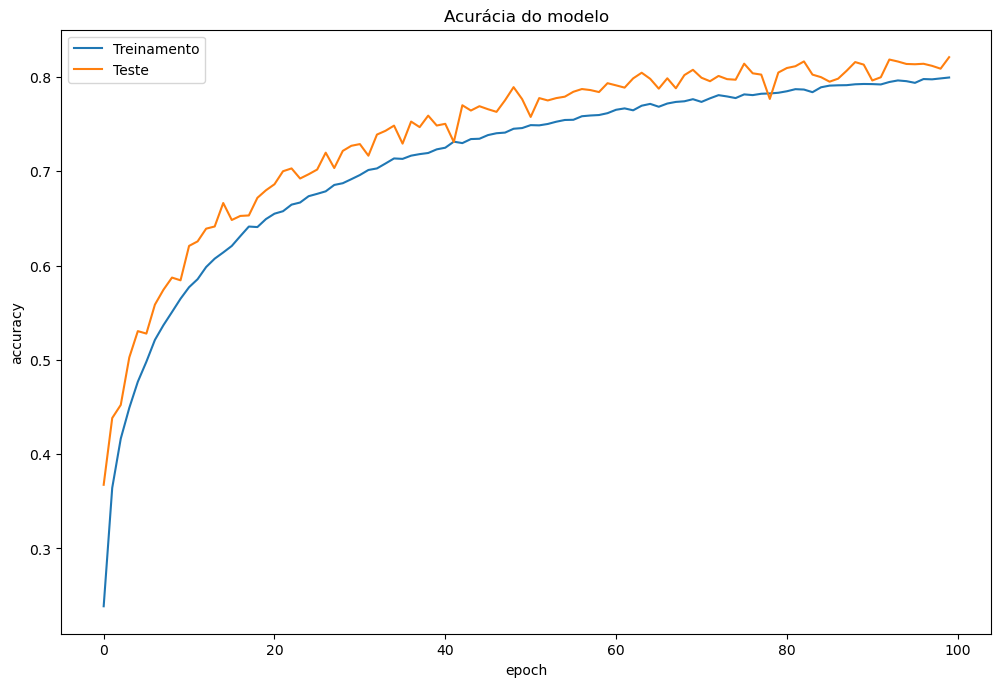

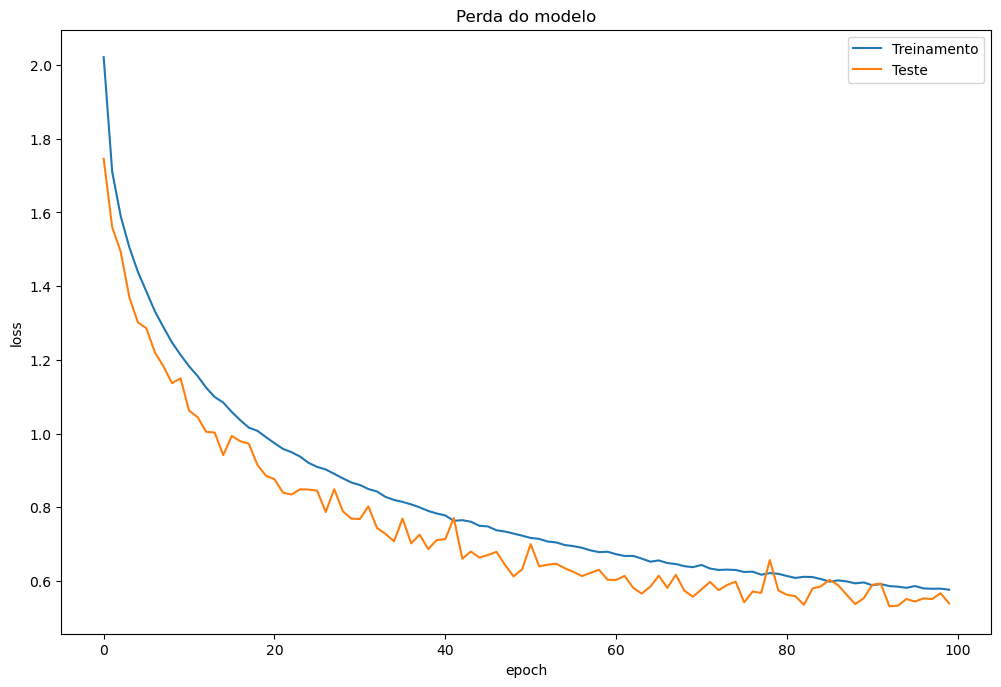

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dados_hist = pd.read_csv("historico.csv")

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(dados_hist['accuracy'])
plt.plot(dados_hist['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

# isso tem o mesmo resultado?
# plot(dados_hist.history['accuracy'], dados_hist.history['val_accuracy'])

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(dados_hist['loss'])
plt.plot(dados_hist['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper right')
plt.show()

## Apresenta as estatísticas de treinamento

In [31]:
# https://keras.io/api/metrics/classification_metrics/#precision-class

## Predição com novos dados

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate( 
    x_test, y_test, batch_size=batch_size, verbose=1)

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)